In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

# Fetch MNIST (70k samples, 784 features)
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

# Check shape
print(X.shape, y.shape)  # (70000, 784)


(70000, 784) (70000,)


In [3]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]


In [4]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss='hinge', random_state=42)
sgd_clf.fit(X_train, y_train)

y_pred_sgd = sgd_clf.predict(X_test)


In [7]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

y_pred_rf = rf_clf.predict(X_test)


In [6]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("SGD Classifier Accuracy:", accuracy_score(y_test, y_pred_sgd))
print(confusion_matrix(y_test, y_pred_sgd))
print(classification_report(y_test, y_pred_sgd))

print("\nRandom Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


SGD Classifier Accuracy: 0.874
[[ 902    0    8   11    1   13    2    4   39    0]
 [   0 1095    2    3    0    2    4    1   28    0]
 [   1   10  803   69    6    4    4   10  122    3]
 [   0    1    6  931    1   21    3    7   35    5]
 [   2    2    9   15  778    4    2    9   62   99]
 [   6    2    1   71    3  709   12   12   67    9]
 [   5    3   12   13    5   21  854    0   45    0]
 [   0    3   18   20    3    4    1  919   18   42]
 [   3    5    2   30    4   43    5    5  872    5]
 [   3    5    2   33    7    5    0   20   57  877]]
              precision    recall  f1-score   support

           0       0.98      0.92      0.95       980
           1       0.97      0.96      0.97      1135
           2       0.93      0.78      0.85      1032
           3       0.78      0.92      0.84      1010
           4       0.96      0.79      0.87       982
           5       0.86      0.79      0.83       892
           6       0.96      0.89      0.93       958
     

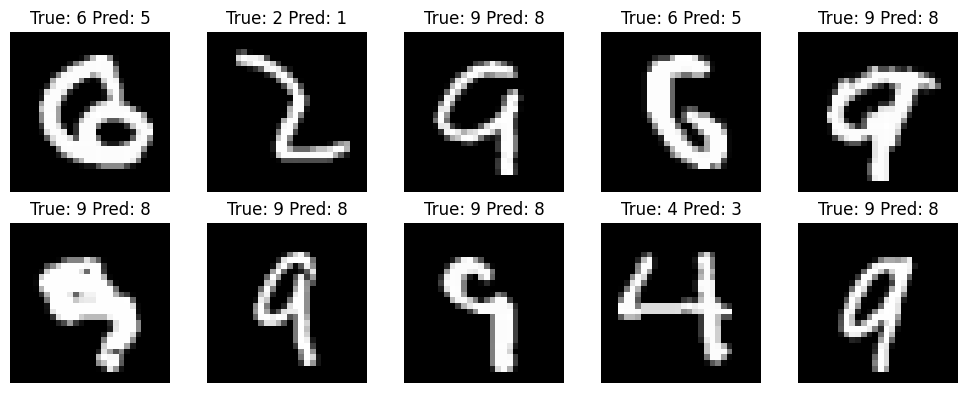

In [8]:
import matplotlib.pyplot as plt

# Find misclassified examples for SGD
misclassified_idx = np.where(y_pred_sgd != y_test)[0]
errors = np.abs(y_pred_sgd[misclassified_idx] - y_test[misclassified_idx])

# Get worst ones (biggest mistakes)
worst_idx = misclassified_idx[np.argsort(errors)[-10:]]

plt.figure(figsize=(10, 4))
for i, idx in enumerate(worst_idx):
    image = X_test[idx].reshape(28, 28)
    plt.subplot(2, 5, i + 1)
    plt.imshow(image, cmap="gray")
    plt.title(f"True: {y_test[idx]} Pred: {y_pred_sgd[idx]}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [19]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(loss='hinge', random_state=42)
sgd.fit(X_train, y_train)


SGDClassifier(random_state=42)

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

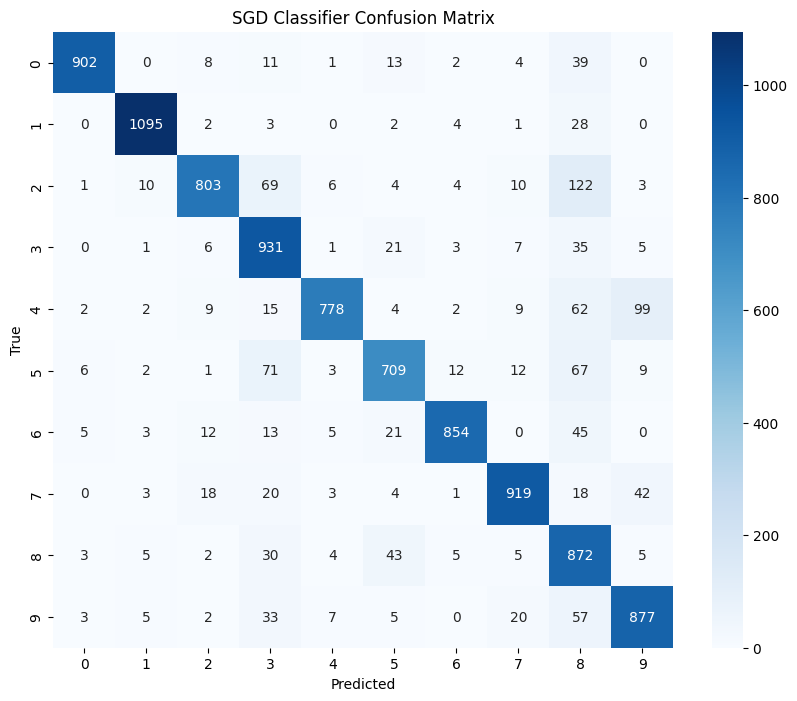

Top Confusions:
 0  0    0
   1    0
   2    0
   3    0
   4    0
dtype: int64


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Confusion Matrix for SGD Classifier
cm = confusion_matrix(y_test, y_pred_sgd)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('SGD Classifier Confusion Matrix')
plt.show()

# See top 5 confusion pairs
import pandas as pd
cm_df = pd.DataFrame(cm)
cm_df.values[[range(10)]*2] = 0  # zero out the diagonal
print("Top Confusions:\n", cm_df.stack().sort_values(ascending=False).head(5))


In [11]:
pip install gradio

In [16]:
import gradio as gr
import numpy as np
from PIL import Image
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier

# Load & train SGD
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist["data"], mnist["target"].astype(np.uint8)
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

sgd_clf = SGDClassifier(loss="hinge", random_state=42)
sgd_clf.fit(X_train, y_train)

# Safe preprocessing with Sketchpad dict output
def preprocess(img):
    print(f"Input type: {type(img)}")
    img_array = img["layers"][0]  # ✅ fix: take first drawn layer
    img = Image.fromarray(np.array(img_array).astype(np.uint8))
    img = img.convert("L").resize((28, 28))
    img_arr = 255 - np.array(img)
    return img_arr.reshape(1, -1)

def predict_digit(img):
    try:
        img_processed = preprocess(img)
        pred = sgd_clf.predict(img_processed)[0]
        return f"Predicted digit: {pred}"
    except Exception as e:
        return f"Error: {e}"

demo = gr.Interface(
    fn=predict_digit,
    inputs=gr.Sketchpad(canvas_size=(28, 28)),
    outputs="text",
    title="MNIST Digit Recognizer",
    description="Draw a digit (0–9) and get a prediction using SGD."
)

demo.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://7290fde76c4dae56e7.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
